In climate data files, the coordinates of the stations are not the same as your assets location. A first step is to identify the relevant station for each asset.

In [1]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import pandas as asset

# Loading the data and preparing the tables

In [3]:
assets=asset.read_csv('C://Users//abder//OneDrive//Documents//PhD//99. Research//MA deals Infra Assets//Assetslist.csv')

Here we test with heavy precipitation days data from NOAA

In [4]:
assets

,Asset name,Longitude,Lattitude,EV_to_EBITDA,Unnamed: 4
0,Aeroporti di Firenze,43.809,11.200,9.24,NaN
1,Brisbane AutoStrad Terminal,-27.365,153.179,11.9,NaN
2,Sydney AutoStrad Terminal,-33.966,151.216,11.1,NaN
3,Patrick Terminals - Melbourne,-37.810,144.920,11.11,NaN
4,Patrick Terminals – Fremantle,-32.037,115.751,11.12,NaN
...,...,...,...,...,...
139,Aéroport de Firenze,43.808,11.202,9.84,NaN
140,Aéroport international Galileo Galilei de Pise,43.686,10.396,9.85,NaN
141,Aéroport de Venise-Marco Polo,45.504,12.351,14.16,NaN
142,Aéroport de Trévise,45.649,12.195,14.17,NaN


In [28]:
#load the data and specifically the long lats from the climate file
climate=Dataset(r'C://Users//abder//OneDrive//Documents//PhD//99. Research//Climate Data Folder//CMIP5_Temperature Max RCP 8-5//tasmax_Amon_GFDL-ESM2G_rcp85_r1i1p1_201101-201512.nc','r')

#to check the names of the coordinates use this functions
climate.variables.keys()

lats=climate.variables['lat'][:]
lons=climate.variables['lon'][:]
time=climate.variables['time'][:]
target=climate.variables['tasmax'][:]

In [26]:
climate.variables.keys()

dict_keys(['average_DT', 'average_T1', 'average_T2', 'lat', 'lon', 'bnds', 'tasmax', 'time', 'time_bnds', 'height', 'lat_bnds', 'lon_bnds'])

In [37]:
climate.variables['tasmax']

<class 'netCDF4._netCDF4.Variable'>
float32 tasmax(time, lat, lon)
    cell_methods: time: maximum within days time: mean over days
    long_name: Daily Maximum Near-Surface Air Temperature
    original_name: t_ref_max
    units: K
    valid_range: [100. 400.]
    coordinates: height
    missing_value: 1e+20
    _FillValue: 1e+20
    standard_name: air_temperature
    original_units: K
    cell_measures: area: areacella
    associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation areacella: areacella_fx_GFDL-ESM2G_rcp85_r0i0p0.nc
unlimited dimensions: time
current shape = (60, 90, 144)
filling on

In [70]:
#Create the dataframe to store the values for our assets
height=assets['Longitude'].size
width=8
df=pd.DataFrame('0', index=range(height),columns=range(width))
#['Asset Name','Asset Longitude','Asset Lattitude','New Longitude','New Lattitude','New Longitude Index','New Lattitude Index','Tasmax']

In [71]:
#Prefill the data frame with the values we know for our assets
df[0]=assets['Asset name']
df[1]=assets['Longitude']
df[2]=assets['Lattitude']
#visualise the dataframe
df

,0,1,2,3,4,5,6,7
0,Aeroporti di Firenze,43.809,11.200,0,0,0,0,0
1,Brisbane AutoStrad Terminal,-27.365,153.179,0,0,0,0,0
2,Sydney AutoStrad Terminal,-33.966,151.216,0,0,0,0,0
3,Patrick Terminals - Melbourne,-37.810,144.920,0,0,0,0,0
4,Patrick Terminals – Fremantle,-32.037,115.751,0,0,0,0,0
...,...,...,...,...,...,...,...,...
139,Aéroport de Firenze,43.808,11.202,0,0,0,0,0
140,Aéroport international Galileo Galilei de Pise,43.686,10.396,0,0,0,0,0
141,Aéroport de Venise-Marco Polo,45.504,12.351,0,0,0,0,0
142,Aéroport de Trévise,45.649,12.195,0,0,0,0,0


# Finding coordinates corresponding to our Assets in the dataset under consideration

In [72]:
for x in range(0,df[0].size):
    #Enter the values of lat and lon of the place we want
    Target_lon=df.iloc[x,1]
    Target_lat=df.iloc[x,2]
    #we can use squared different to find the closes values
    sq_diff_lat=(lats-Target_lat)**2
    sq_diff_lon=(lons-Target_lon)**2

    #we need the find the index of the minimum value or the closest value in our table with the target variables
    min_index_lat=sq_diff_lat.argmin()
    min_index_lon=sq_diff_lon.argmin()
    #we store the values needed
    df.iloc[x,3]=lats[min_index_lat]
    df.iloc[x,4]=lons[min_index_lon]
    #we store the values needed
    df.iloc[x,5]=min_index_lat
    df.iloc[x,6]=min_index_lon  
    #print the value that we are looking for anc chose a value
    df.iloc[x,7]=target[10,min_index_lon,min_index_lon]  
df

,0,1,2,3,4,5,6,7
0,Aeroporti di Firenze,43.809,11.200,11.1236,43.75,50,17,275.239
1,Brisbane AutoStrad Terminal,-27.365,153.179,89.4944,1.25,89,0,241.171
2,Sydney AutoStrad Terminal,-33.966,151.216,89.4944,1.25,89,0,241.171
3,Patrick Terminals - Melbourne,-37.810,144.920,89.4944,1.25,89,0,241.171
4,Patrick Terminals – Fremantle,-32.037,115.751,89.4944,1.25,89,0,241.171
...,...,...,...,...,...,...,...,...
139,Aéroport de Firenze,43.808,11.202,11.1236,43.75,50,17,275.239
140,Aéroport international Galileo Galilei de Pise,43.686,10.396,11.1236,43.75,50,17,275.239
141,Aéroport de Venise-Marco Polo,45.504,12.351,13.1461,46.25,51,18,276.267
142,Aéroport de Trévise,45.649,12.195,13.1461,46.25,51,18,276.267


The objective of visualising is to check if the stations we have are close to the locations of the assets

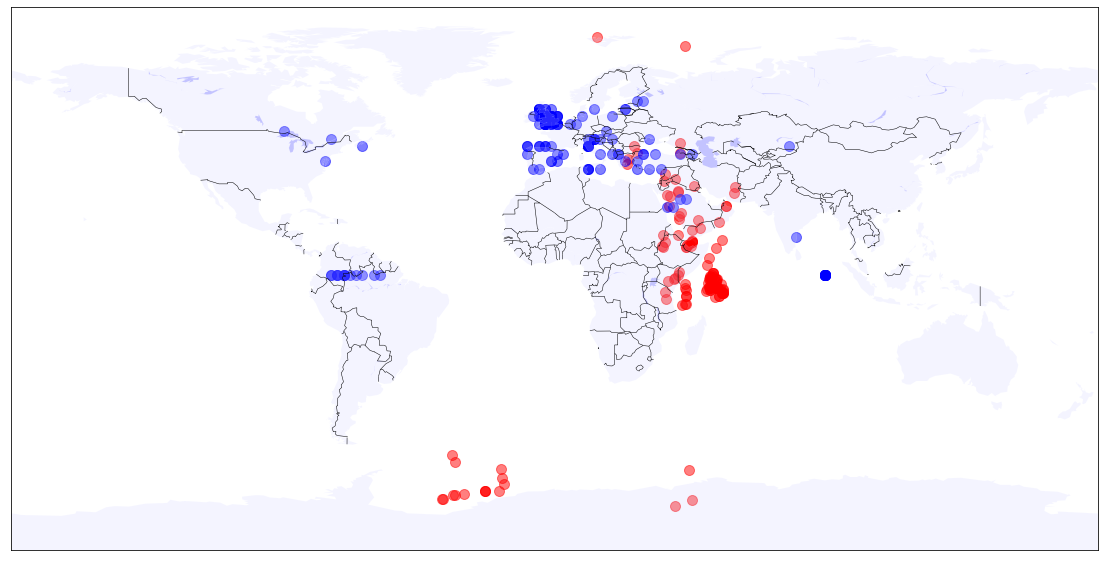

In [73]:
#plotting the stations
#Plotting the results the assets
#Initiate map variables
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(20,10))

m=Basemap()
#draw coastline
m.drawcoastlines(linewidth=0.1, color="white")
#draw countries borders
m.drawcountries()
#fill continents
m.fillcontinents(color='#c9cbff',lake_color='blue',alpha=.2)
# Control the background color
#m.drawmapboundary(fill_color='#ffe5b9', linewidth=0,alpha=1)

#Assets
x1=df[1].tolist()
y1=df[2].tolist()

#stations
x2=df[3].tolist()
y2=df[4].tolist()

m.scatter(x1,y1,latlon=True,s=100,c='red', marker='o', alpha=0.5)
m.scatter(x2,y2,latlon=True,s=100,c='blue', marker='o', alpha=0.5)
plt.show()

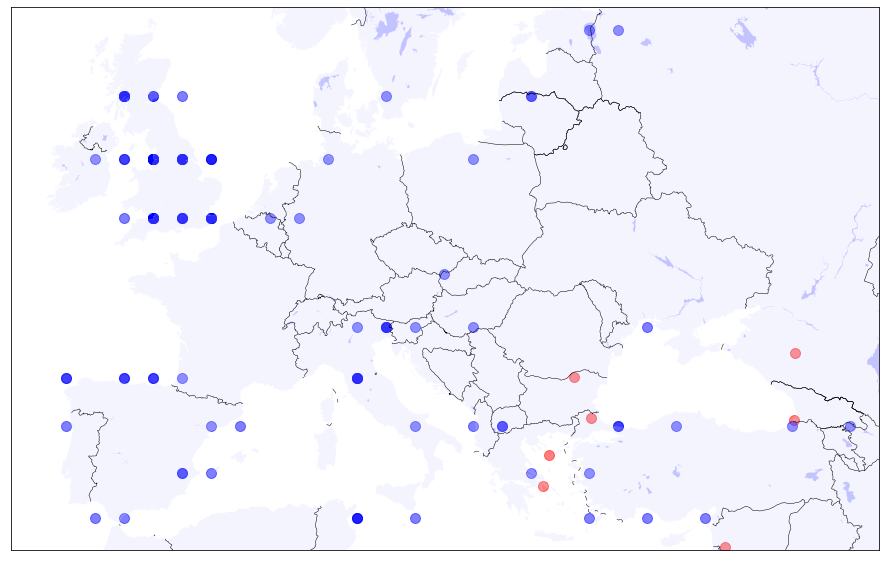

In [74]:
#Zoom on Europe
#Focuses Map
fig=plt.figure(figsize=(20,10))

m=Basemap(projection='merc', 
          llcrnrlon=-12.978605, 
         llcrnrlat= 34.434989, 
         urcrnrlon=47.534091,
         urcrnrlat= 59.568270, 
         resolution ='i')

#draw coastline
m.drawcoastlines(linewidth=0.1, color="white")
#draw countries borders
m.drawcountries()
#fill continents
m.fillcontinents(color='#c9cbff',lake_color='blue',alpha=.2)
# Control the background color
#m.drawmapboundary(fill_color='#ffe5b9', linewidth=0,alpha=1)

#Assets
x1=df[1].tolist()
y1=df[2].tolist()

#stations
x2=df[3].tolist()
y2=df[4].tolist()

m.scatter(x1,y1,latlon=True,s=100,c='red', marker='o', alpha=0.5)
m.scatter(x2,y2,latlon=True,s=100,c='blue', marker='o', alpha=0.5)
plt.show()

In [75]:
df.to_csv('C://Users//abder//Downloads//target_data.csv')